In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

## full figure

In [3]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_na = np.load("/media/hdd01/sklee/CA1_clust8-30/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_na = np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean
one8_na_test = np.load("/media/hdd01/sklee/CA1_clust8-30/whole/glm_s14_h1_output.npz")["test"] + true8_na_mean
two8_na_test = np.load("/media/hdd01/sklee/CA1_clust8-30/whole/glm_s14_h2_output.npz")["test"] + true8_na_mean
gru8_na_test = np.load("/media/hdd01/sklee/CA1_clust8-30/whole/gru_s14_h20_output.npz")["test"] + true8_na_mean
one12_na_test = np.load("/media/hdd01/sklee/CA1_clust12-20/whole/glm_s18_h1_output.npz")["test"] + true12_na_mean
two12_na_test = np.load("/media/hdd01/sklee/CA1_clust12-20/whole/glm_s18_h2_output.npz")["test"] + true12_na_mean
gru12_na_test = np.load("/media/hdd01/sklee/CA1_clust12-20/whole/gru_s18_h20_output.npz")["test"] + true12_na_mean

two4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["e_kern"]
two4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["i_kern"]
two4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["nonlin_in"]

one4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["e_kern"]
one4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["i_kern"]
one4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["nonlin_in"]


In [4]:
var_exp_array = np.zeros((3,3,20))

for i in range(20):
    var_exp_array[0,0,i] = explained_variance_score(true4_na[i], one4_na_test[i])
    var_exp_array[0,1,i] = explained_variance_score(true4_na[i], two4_na_test[i])
    var_exp_array[0,2,i] = explained_variance_score(true4_na[i], gru4_na_test[i])
    var_exp_array[1,0,i] = explained_variance_score(true8_na[i], one8_na_test[i])
    var_exp_array[1,1,i] = explained_variance_score(true8_na[i], two8_na_test[i])
    var_exp_array[1,2,i] = explained_variance_score(true8_na[i], gru8_na_test[i])
    var_exp_array[2,0,i] = explained_variance_score(true12_na[i], one12_na_test[i])
    var_exp_array[2,1,i] = explained_variance_score(true12_na[i], two12_na_test[i])
    var_exp_array[2,2,i] = explained_variance_score(true12_na[i], gru12_na_test[i])
    
thresh_bin_no = 250
bin_no = 250

na_means = np.zeros((thresh_bin_no, 4))
na_stds = np.zeros((thresh_bin_no, 4))
na_bins = np.linspace(np.min(true4_na), np.max(true4_na), thresh_bin_no+1)

for i in range(thresh_bin_no):
    na_idx = np.where((true4_na.flatten() >= na_bins[i]) & (true4_na.flatten() < na_bins[i+1]))[0]
    na_means[i,1] = np.mean(one4_na_test.flatten()[na_idx])
    na_means[i,2] = np.mean(two4_na_test.flatten()[na_idx])
    na_means[i,3] = np.mean(gru4_na_test.flatten()[na_idx])
    na_means[i,0] = (na_bins[i] + na_bins[i+1])/2
    
    na_stds[i,0] = (na_bins[i] + na_bins[i+1])/2
    na_stds[i,1] = np.std(one4_na_test.flatten()[na_idx])
    na_stds[i,2] = np.std(two4_na_test.flatten()[na_idx])
    na_stds[i,3] = np.std(gru4_na_test.flatten()[na_idx])

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No handles with labels found to put in legend.
<ipython-input-5-190558e9afd1>:196: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-5-190558e9afd1>:198: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("/home/sklee/dendrite/fig3/fig3_raw.pdf", bbox_inches="tight", transparent=True)
/home/sklee/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


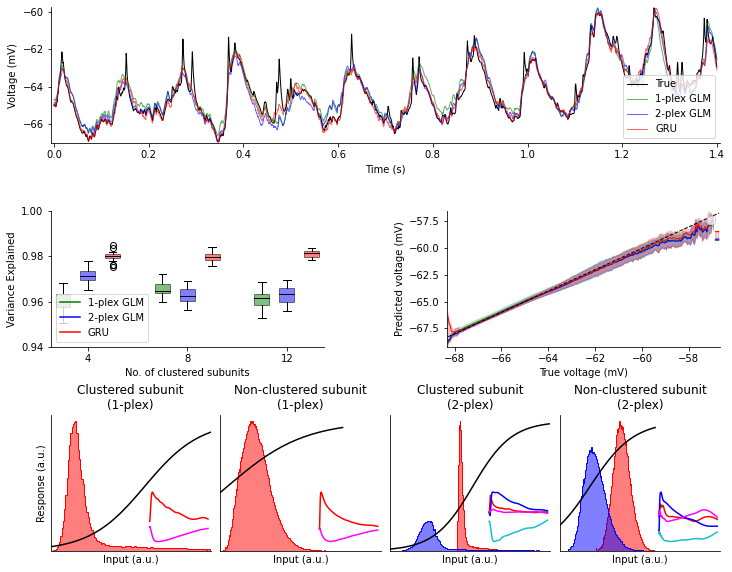

In [5]:
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['font.sans-serif'] = "Arial"
#mpl.rcParams['font.family'] = "sans-serif"

fig = plt.figure(constrained_layout=True, figsize = (12,10))
gs = fig.add_gridspec(3,12, wspace=0.2, hspace=0.5)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:5])
ax3 = fig.add_subplot(gs[1,7:])
ax4 = fig.add_subplot(gs[2,:3])
ax5 = fig.add_subplot(gs[2,3:6])
ax6 = fig.add_subplot(gs[2,6:9])
ax7 = fig.add_subplot(gs[2,9:])

ax1.plot(np.arange(0,1.4,1/5000), true4_na[-1][17000:24000], linewidth=1, color="black", label="True")
ax1.plot(np.arange(0,1.4,1/5000), one4_na_test[-1][17000:24000], linewidth=1, color="green", label="1-plex GLM", alpha=0.6)
ax1.plot(np.arange(0,1.4,1/5000), two4_na_test[-1][17000:24000], linewidth=1, color="blue", label="2-plex GLM", alpha=0.6)
ax1.plot(np.arange(0,1.4,1/5000), gru4_na_test[-1][17000:24000], linewidth=1, color="red", label="GRU", alpha=0.6)
ax1.legend(loc="lower right")
ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel("Voltage (mV)")
ax1.set_xlabel("Time (s)")

colors = ["green", "blue", "red"]

# first boxplot pair
bp = ax2.boxplot(var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = ax2.boxplot(var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = ax2.boxplot(var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")


ax2.set_ylim(0.94,1)
ax2.set_xticks([2,6,10])
ax2.set_xticklabels(["4", "8", "12"])
ax2.set_xlabel("No. of clustered subunits")
ax2.set_ylabel("Variance Explained")
ax2.margins(x=0.005, y=0.005)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

hB, = ax2.plot(1,1,'blue')
hR, = ax2.plot(1,1,'red')
hG, = ax2.plot(1,1,'green')
ax2.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

ax3.plot(na_means[:,0],na_means[:,1], linewidth=1, color="green")
ax3.plot(na_means[:,0],na_means[:,2], linewidth=1, color="blue")
ax3.plot(na_means[:,0],na_means[:,3], linewidth=1, color="red")
ax3.fill_between(na_means[:,0], na_means[:,1]-na_stds[:,1], na_means[:,1]+na_stds[:,1], color="green", alpha=0.2)
ax3.fill_between(na_means[:,0], na_means[:,2]-na_stds[:,2], na_means[:,2]+na_stds[:,2], color="blue", alpha=0.2)
ax3.fill_between(na_means[:,0], na_means[:,2]-na_stds[:,3], na_means[:,3]+na_stds[:,3], color="red", alpha=0.2)
ax3.plot(na_means[:,0], na_means[:,0], linewidth=1, color="black", linestyle="--")
ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.set_xlabel("True voltage (mV)")
ax3.set_ylabel("Predicted voltage (mV)")
ax3.legend(loc="upper right")

# Subunit 1 #
y1, x1, _ = ax4.hist(one4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = np.min(x1)
max_x = np.max(x1)
max_y = np.max(y1)
x = np.arange(min_x, max_x, 0.1)
ax4.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_xlim(min_x, 1.2)
ax4.set_ylabel("Response (a.u.)")
ax4.set_xlabel("Input (a.u.)")
ax4.set_title("Clustered subunit\n(1-plex)")

ins = ax4.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(one4_na_ekern[9,0,:], color="red")
ins.plot(one4_na_ikern[9,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])


# Subunit 2 #
y1, x1, _ = ax5.hist(one4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = np.min(x1)
max_x = np.max(x1)
max_y = np.max(y1)
x = np.arange(min_x, max_x, 0.1)
ax5.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)
ax5.set_yticks([])
ax5.set_xticks([])
ax5.set_xlim(min_x, 2)
ax5.set_xlabel("Input (a.u.)")
ax5.set_title("Non-clustered subunit\n(1-plex)")

ins = ax5.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(one4_na_ekern[1,0,:], color="red")
ins.plot(one4_na_ikern[1,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 3 #
y1, x1, _ = ax6.hist(two4_na_nonlin[:,9,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax6.hist(two4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax6.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax6.spines.right.set_visible(False)
ax6.spines.top.set_visible(False)
ax6.set_yticks([])
ax6.set_xticks([])
ax6.set_xlim(min_x, 2)
ax6.set_xlabel("Input (a.u.)")
ax6.set_title("Clustered subunit\n(2-plex)")

ins = ax6.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[9,1,:], color="red")
ins.plot(two4_na_ekern[9,0,:], color="blue")
ins.plot(two4_na_ikern[9,1,:], color="fuchsia")
ins.plot(two4_na_ikern[9,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = ax7.hist(two4_na_nonlin[:,1,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax7.hist(two4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax7.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax7.spines.right.set_visible(False)
ax7.spines.top.set_visible(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax7.set_xlim(min_x, 3)
ax7.set_xlabel("Input (a.u.)")
ax7.set_title("Non-clustered subunit\n(2-plex)")

ins = ax7.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[1,1,:], color="red")
ins.plot(two4_na_ekern[1,0,:], color="blue")
ins.plot(two4_na_ikern[1,1,:], color="fuchsia")
ins.plot(two4_na_ikern[1,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig3/fig3_raw.pdf", bbox_inches="tight", transparent=True)

## whole voltage fits

In [3]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean

Text(0.5, 0, 'Time (s)')

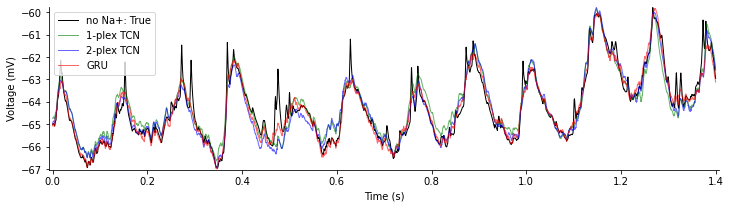

In [12]:
fig = plt.figure(figsize = (12,3))
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(0,1.4,1/5000), true4_na[-1][17000:24000], linewidth=1, color="black", label="no Na+: True")
ax.plot(np.arange(0,1.4,1/5000), one4_na_test[-1][17000:24000], linewidth=1, color="green", label="1-plex TCN", alpha=0.6)
ax.plot(np.arange(0,1.4,1/5000), two4_na_test[-1][17000:24000], linewidth=1, color="blue", label="2-plex TCN", alpha=0.6)
ax.plot(np.arange(0,1.4,1/5000), gru4_na_test[-1][17000:24000], linewidth=1, color="red", label="GRU", alpha=0.6)
ax.legend(loc="upper left")
ax.margins(x=0.005, y=0.005)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel("Voltage (mV)")
ax.set_xlabel("Time (s)")

## var exp box

In [3]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean

In [4]:
var_exp_array = np.zeros((3,3,20))

for i in range(20):
    var_exp_array[0,0,i] = explained_variance_score(true4_na[i], one4_na_test[i])
    var_exp_array[0,1,i] = explained_variance_score(true4_na[i], two4_na_test[i])
    var_exp_array[0,2,i] = explained_variance_score(true4_na[i], gru4_na_test[i])

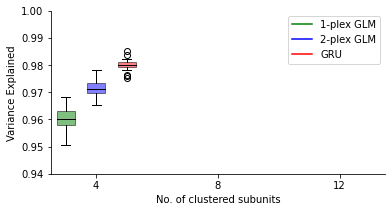

In [11]:
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(1,1,1)

colors = ["green", "blue", "red"]

# first boxplot pair
bp = ax.boxplot(var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = ax.boxplot(var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = ax.boxplot(var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")

ax.set_ylim(0.94,1)
ax.set_xticks([2,6,10])
ax.set_xticklabels(["4", "8", "12"])
ax.set_xlabel("No. of clustered subunits")
ax.set_ylabel("Variance Explained")
ax.margins(x=0.005, y=0.005)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

hB, = ax.plot(1,1,'blue')
hR, = ax.plot(1,1,'red')
hG, = ax.plot(1,1,'green')
ax.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

## threshold voltages

In [3]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean

In [4]:
thresh_bin_no = 250

na_means = np.zeros((thresh_bin_no, 4))
na_stds = np.zeros((thresh_bin_no, 4))
na_bins = np.linspace(np.min(true4_na), np.max(true4_na), thresh_bin_no+1)

for i in range(thresh_bin_no):
    na_idx = np.where((true4_na.flatten() >= na_bins[i]) & (true4_na.flatten() < na_bins[i+1]))[0]
    na_means[i,1] = np.mean(one4_na_test.flatten()[na_idx])
    na_means[i,2] = np.mean(two4_na_test.flatten()[na_idx])
    na_means[i,3] = np.mean(gru4_na_test.flatten()[na_idx])
    na_means[i,0] = (na_bins[i] + na_bins[i+1])/2
    na_stds[i,0] = (na_bins[i] + na_bins[i+1])/2
    na_stds[i,1] = np.std(one4_na_test.flatten()[na_idx])
    na_stds[i,2] = np.std(two4_na_test.flatten()[na_idx])
    na_stds[i,3] = np.std(gru4_na_test.flatten()[na_idx])

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


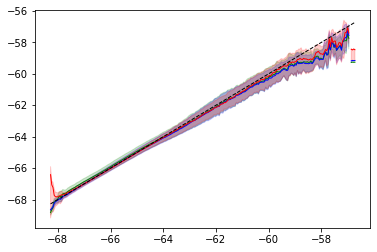

In [7]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(na_means[:,0],na_means[:,1], linewidth=1, color="green")
ax.plot(na_means[:,0],na_means[:,2], linewidth=1, color="blue")
ax.plot(na_means[:,0],na_means[:,3], linewidth=1, color="red")
ax.fill_between(na_means[:,0], na_means[:,1]-na_stds[:,1], na_means[:,1]+na_stds[:,1], color="green", alpha=0.2)
ax.fill_between(na_means[:,0], na_means[:,2]-na_stds[:,2], na_means[:,2]+na_stds[:,2], color="blue", alpha=0.2)
ax.fill_between(na_means[:,0], na_means[:,2]-na_stds[:,3], na_means[:,3]+na_stds[:,3], color="red", alpha=0.2)
ax.plot(na_means[:,0], na_means[:,0], linewidth=1, color="black", linestyle="--")

## Kernels + nonlinearities

In [30]:
two4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["e_kern"]
two4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["i_kern"]
two4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["nonlin_in"]

one4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["e_kern"]
one4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["i_kern"]
one4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["nonlin_in"]


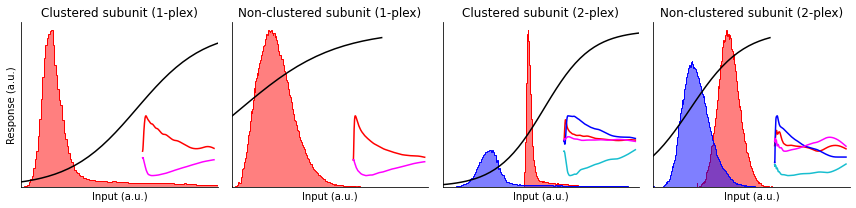

In [38]:
fig, axs = plt.subplots(ncols=4, figsize = (12,3))

bin_no = 250

# Subunit 1 #
y2, x2, _ = axs[0].hist(one4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[0].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_xlim(min_x, 1.2)
axs[0].set_ylabel("Response (a.u.)")
axs[0].set_xlabel("Input (a.u.)")
axs[0].set_title("Clustered subunit (1-plex)")

ins = axs[0].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(one4_na_ekern[9,0,:], color="red")
ins.plot(one4_na_ikern[9,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])


# Subunit 2 #
y2, x2, _ = axs[1].hist(one4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[1].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_xlim(min_x, 2)
axs[1].set_xlabel("Input (a.u.)")
axs[1].set_title("Non-clustered subunit (1-plex)")

ins = axs[1].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(one4_na_ekern[1,0,:], color="red")
ins.plot(one4_na_ikern[1,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 3 #
y1, x1, _ = axs[2].hist(two4_na_nonlin[:,9,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[2].hist(two4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[2].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[2].spines.right.set_visible(False)
axs[2].spines.top.set_visible(False)
axs[2].set_yticks([])
axs[2].set_xticks([])
axs[2].set_xlim(min_x, 2)
axs[2].set_xlabel("Input (a.u.)")
axs[2].set_title("Clustered subunit (2-plex)")

ins = axs[2].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[9,1,:], color="red")
ins.plot(two4_na_ekern[9,0,:], color="blue")
ins.plot(two4_na_ikern[9,1,:], color="fuchsia")
ins.plot(two4_na_ikern[9,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = axs[3].hist(two4_na_nonlin[:,1,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[3].hist(two4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[3].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[3].spines.right.set_visible(False)
axs[3].spines.top.set_visible(False)
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[3].set_xlim(min_x, 3)
axs[3].set_xlabel("Input (a.u.)")
axs[3].set_title("Non-clustered subunit (2-plex)")

ins = axs[3].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[1,1,:], color="red")
ins.plot(two4_na_ekern[1,0,:], color="blue")
ins.plot(two4_na_ikern[1,1,:], color="fuchsia")
ins.plot(two4_na_ikern[1,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

fig.tight_layout()
plt.show()